# Import Libraries

<!-- Cell 1: Import Libraries -->

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import mlflow
import mlflow.sklearn
import dagshub
import os
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')
from mlflow.models import infer_signature

# Configure DagsHub and MLflow

In [2]:
import dagshub
dagshub.init(repo_owner='reemfad51', repo_name='student-gpa-prediction', mlflow=True)

import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=495ea071-b80a-4f6e-a410-8d4a0362c4b5&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=6f05767ebb010f403d346926c99364cd0a05f243e3c1ff59ffebe5d20ec971ed




Repository initialized!

# Load Data

In [3]:
def load_data(file_path):
    """Load and return dataset"""
    df = pd.read_csv(file_path)
    print(f"Dataset loaded: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    return df

# Load data
df = load_data(r'C:\Users\96170\OneDrive - Lebanese University\MachingeLearning_DataScience_InProduction\student-gpa-prediction\data\raw\user_data.csv')
df.head()

Dataset loaded: (9993, 26)
Columns: ['id', 'mobile', 'email', 'defaultCommunication', 'firstname', 'lastname', 'academicyear', 'address', 'athleticstatus', 'countryoforigin', 'countryofresidence', 'disability', 'dob', 'gender', 'gpa', 'lat', 'lon', 'major', 'primarylanguage', 'user_id', 'university', 'source', 'sourceId', 'userType', 'createdAt', 'dropout']


,id,mobile,email,defaultCommunication,firstname,lastname,academicyear,address,athleticstatus,countryoforigin,...,lon,major,primarylanguage,user_id,university,source,sourceId,userType,createdAt,dropout
0,1,NaN,judith.marks@eduway.com,judith.marks@eduway.com,Judith,Marks,phd,"225 Conrad Park, North Sylvesterbury, NJ 94789",Active,Germany,...,-112.69993,Chemistry,French,172-57-9188,Bernhard Academy,web,NaN,2,2025-09-17 21:32:30.848327,1.0
1,2,NaN,randal.mills@eduway.com,randal.mills@eduway.com,Randal,Mills,graduate,"020 Steuber Glen, South Lulafort, AZ 47935",Active,Germany,...,50.82576,Chemistry,Arabic,039-53-6300,South Corkery Academy,web,NaN,2,2025-09-17 21:32:31.405127,0.0
2,3,NaN,donnette.kreiger@eduway.com,donnette.kreiger@eduway.com,Donnette,Kreiger,phd,"Apt. 345 916 Kiehn Brooks, Webershire, NY 07886",Inactive,Saudi Arabia,...,170.47451,Biology,English,039-47-6396,Northern Pennsylvania University,web,NaN,2,2025-09-17 21:32:31.440511,0.0
3,4,NaN,lane.hagenes@eduway.com,lane.hagenes@eduway.com,Lane,Hagenes,phd,"Suite 474 4872 Bo Locks, Reynaldafort, WV 65004",Inactive,Australia,...,-156.66834,Computer Science,German,308-30-7498,West Aufderhar University,web,NaN,2,2025-09-17 21:32:31.477520,1.0
4,5,NaN,charise.powlowski@eduway.com,charise.powlowski@eduway.com,Charise,Powlowski,phd,"Suite 581 84432 Kohler Parks, Blickstad, WV 38...",Active,Canada,...,-119.77414,Chemistry,French,766-27-2428,Southern Hyatt Academy,web,NaN,2,2025-09-17 21:32:31.494770,1.0


# Basic Data Exploration

In [4]:
# Display dataset info
print("Dataset Information:")
print("="*50)
df.info()

print("\n" + "="*50)
print("Statistical Summary:")
print("="*50)
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9993 non-null   int64  
 1   mobile                0 non-null      float64
 2   email                 9993 non-null   object 
 3   defaultCommunication  9993 non-null   object 
 4   firstname             9992 non-null   object 
 5   lastname              9990 non-null   object 
 6   academicyear          9988 non-null   object 
 7   address               9988 non-null   object 
 8   athleticstatus        9988 non-null   object 
 9   countryoforigin       9990 non-null   object 
 10  countryofresidence    9988 non-null   object 
 11  disability            9988 non-null   object 
 12  dob                   9990 non-null   object 
 13  gender                9990 non-null   object 
 14  gpa                   9990 non-null   float64
 15  

,id,mobile,gpa,lat,lon,sourceId,userType,dropout
count,9993.000000,0.0,9990.000000,9988.000000,9988.000000,0.0,9993.000000,9988.000000
mean,4997.061343,NaN,2.709153,0.444714,3.381954,NaN,2.349345,0.113136
std,2884.982458,NaN,0.411583,52.027201,103.635970,NaN,0.964203,0.316775
min,1.000000,NaN,0.000000,-89.987171,-179.979580,NaN,1.000000,0.000000
25%,2499.000000,NaN,2.360000,-44.324270,-86.520112,NaN,2.000000,0.000000
50%,4997.000000,NaN,2.700000,0.077684,4.616808,NaN,2.000000,0.000000
75%,7495.000000,NaN,3.070000,45.340829,93.912806,NaN,3.000000,0.000000
max,10118.000000,NaN,3.410000,89.983526,179.988010,NaN,5.000000,1.000000


# Check for Missing Values

In [5]:
# Check missing values
print("Missing Values:")
print("="*50)
missing = df.isnull().sum()
print(missing[missing > 0])

if missing.sum() == 0:
    print("No missing values found!")

Missing Values:
mobile                9993
firstname                1
lastname                 3
academicyear             5
address                  5
athleticstatus           5
countryoforigin          3
countryofresidence       5
disability               5
dob                      3
gender                   3
gpa                      3
lat                      5
lon                      5
major                    5
primarylanguage          5
user_id                  3
university               5
source                   2
sourceId              9993
dropout                  5
dtype: int64


In [31]:
missing = df.isnull().sum()
missing

id                      0
email                   0
defaultCommunication    0
firstname               1
lastname                3
academicyear            5
address                 5
athleticstatus          5
countryoforigin         3
countryofresidence      5
disability              5
dob                     3
gender                  3
gpa                     3
major                   5
primarylanguage         5
user_id                 3
university              5
source                  2
userType                0
dropout                 5
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9993 non-null   int64  
 1   email                 9993 non-null   object 
 2   defaultCommunication  9993 non-null   object 
 3   firstname             9992 non-null   object 
 4   lastname              9990 non-null   object 
 5   academicyear          9988 non-null   object 
 6   address               9988 non-null   object 
 7   athleticstatus        9988 non-null   object 
 8   countryoforigin       9990 non-null   object 
 9   countryofresidence    9988 non-null   object 
 10  disability            9988 non-null   object 
 11  dob                   9990 non-null   object 
 12  gender                9990 non-null   object 
 13  gpa                   9990 non-null   float64
 14  major                 9988 non-null   object 
 15  primarylanguage      

# Preprocess Data

In [33]:
def preprocess_data(df):
    """
    Basic preprocessing for GPA prediction
    """
    df_clean = df.copy()
    
    # Handle missing values in target
    df_clean = df_clean.dropna(subset=['gpa'])
    
    # Separate features and target
    target_col = 'gpa'
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    
    # Encode categorical variables
    label_encoders = {}
    categorical_cols = X.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded column: {col}")
    
    # Fill remaining missing values with median
    X = X.fillna(X.median(numeric_only=True))
    
    print(f"\nFeatures: {X.shape[1]}")
    print(f"Samples: {len(X)}")
    print(f"Target range: [{y.min():.2f}, {y.max():.2f}]")
    
    return X, y, label_encoders

# Preprocess data
X, y, encoders = preprocess_data(df)

Encoded column: email
Encoded column: defaultCommunication
Encoded column: firstname
Encoded column: lastname
Encoded column: academicyear
Encoded column: address
Encoded column: athleticstatus
Encoded column: countryoforigin
Encoded column: countryofresidence
Encoded column: disability
Encoded column: dob
Encoded column: gender
Encoded column: major
Encoded column: primarylanguage
Encoded column: user_id
Encoded column: university
Encoded column: source

Features: 20
Samples: 9990
Target range: [0.00, 3.41]


# Split Data

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Feature columns: {list(X.columns)}")

Training set size: 7992
Test set size: 1998
Feature columns: ['id', 'email', 'defaultCommunication', 'firstname', 'lastname', 'academicyear', 'address', 'athleticstatus', 'countryoforigin', 'countryofresidence', 'disability', 'dob', 'gender', 'lat', 'lon', 'major', 'primarylanguage', 'user_id', 'university', 'source', 'userType', 'createdAt', 'dropout']


 # Define Training Function

In [20]:
params = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_split': 4,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': 42,
    'n_jobs': -1
}

def train_model(X_train, y_train, params):
    """Train Random Forest model"""
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    return model

model=train_model(X_train=X_train,y_train=y_train,params=params)

 # Define Evaluation Function

In [22]:
def evaluate_model(model, X_test, y_test):
    """Evaluate model performance"""
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    metrics = {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2_score': r2
    }
    
    return metrics, predictions

# Train and Log Model with MLflow

In [ ]:
# Model parameters
params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

# Start MLflow run
with mlflow.start_run(run_name="baseline_model"):
    # Log parameters
    mlflow.log_params(params)
    
    # Train model
    print("Training model...")
    model = train_model(X_train, y_train, params)
    print("Training completed!")
    
    # Evaluate
    print("\nEvaluating model...")
    metrics, predictions = evaluate_model(model, X_test, y_test)
    
    # Log metrics
    mlflow.log_metrics(metrics)
    
    # Log model
    mlflow.sklearn.log_model(
        model, 
        "model",
        registered_model_name="gpa_predictor"
    )
#logging model with the use of inputs and outputs
# signature = infer_signature(X_train, model.predict(X_train))

# # Log model WITH signature
# mlflow.sklearn.log_model(
#     model, 
#     "model",
#     signature=signature,
#     registered_model_name="gpa_predictor",
#     input_example=X_train.iloc[:5]  # Log sample input for reference
# )


    # Print results
    print("\n" + "="*50)
    print("Model Performance:")
    print("="*50)
    for metric, value in metrics.items():
        print(f"{metric.upper()}: {value:.4f}")
    print("="*50)
    
    print(f"\nMLflow Run ID: {mlflow.active_run().info.run_id}")

Training model...
Training completed!

Evaluating model...


Successfully registered model 'gpa_predictor'.
2026/01/24 14:21:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: gpa_predictor, version 1
Created version '1' of model 'gpa_predictor'.



Model Performance:
MSE: 0.1258
RMSE: 0.3547
MAE: 0.2949
R2_SCORE: 0.2741

MLflow Run ID: e9d2692701cc4a29babe79b2244efc4e


# Feature Importance Analysis

In [24]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print("="*50)
print(feature_importance.head(10))

Top 10 Most Important Features:
       feature  importance
22     dropout    0.603015
0           id    0.050850
21   createdAt    0.048869
18  university    0.031838
17     user_id    0.029735
6      address    0.029440
14         lon    0.028719
4     lastname    0.028598
13         lat    0.028359
11         dob    0.026938


# Save Processed Data for DVC

In [ ]:
# Save preprocessed data for DVC tracking
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

os.makedirs('data/processed', exist_ok=True)
train_data.to_csv('data/processed/train.csv', index=False)
test_data.to_csv('data/processed/test.csv', index=False)

print("Processed data saved to:")
print("  - data/processed/train.csv")
print("  - data/processed/test.csv")

# Predictions Analysis

In [25]:
# Create predictions dataframe
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions,
    'Error': y_test.values - predictions
})

print("Sample Predictions:")
print("="*50)
print(results.head(10))

print("\n" + "="*50)
print("Prediction Error Statistics:")
print("="*50)
print(results['Error'].describe())

Sample Predictions:
   Actual  Predicted     Error
0    2.05   2.132051 -0.082051
1    2.96   2.793639  0.166361
2    2.56   2.834322 -0.274322
3    2.57   2.849606 -0.279606
4    3.05   2.720485  0.329515
5    2.44   2.687402 -0.247402
6    3.16   2.727942  0.432058
7    2.46   2.812153 -0.352153
8    2.73   2.885825 -0.155825
9    2.78   2.852435 -0.072435

Prediction Error Statistics:
count    1998.000000
mean        0.006433
std         0.354735
min        -1.559230
25%        -0.273589
50%        -0.001482
75%         0.294323
max         0.741746
Name: Error, dtype: float64


#  Visualize Predictions

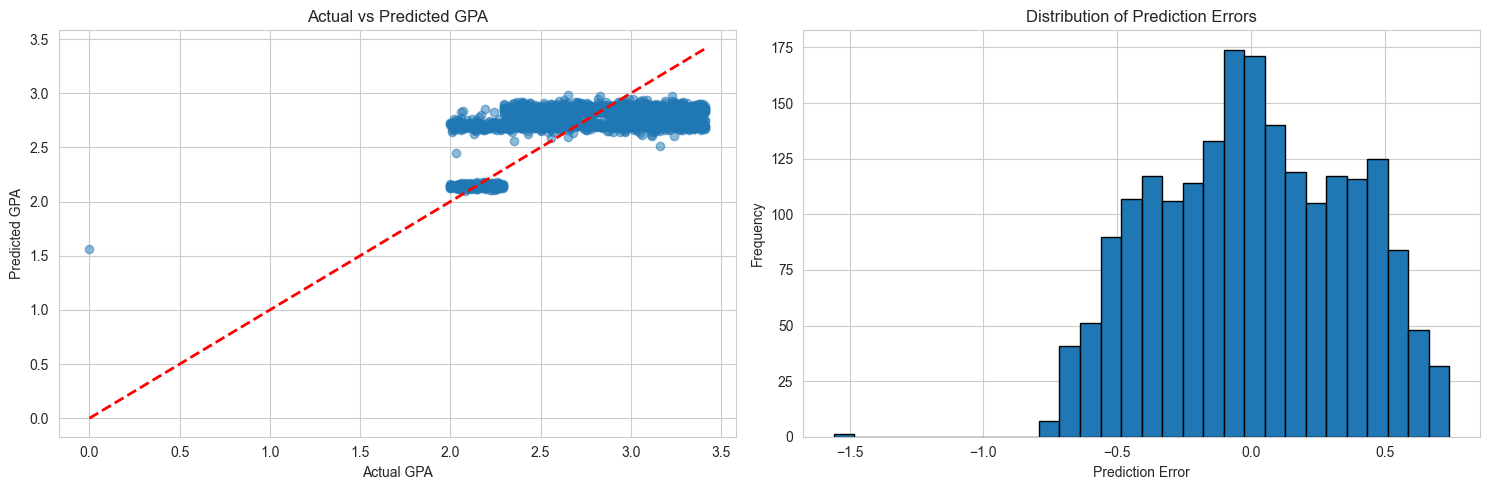

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Actual vs Predicted
axes[0].scatter(y_test, predictions, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual GPA')
axes[0].set_ylabel('Predicted GPA')
axes[0].set_title('Actual vs Predicted GPA')

# Error distribution
axes[1].hist(results['Error'], bins=30, edgecolor='black')
axes[1].set_xlabel('Prediction Error')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()